In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit
from qiskit import BasicAer
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from random import randint
import hashlib

In [2]:
#Defining the encryption function

def encryption(qc, initialString, pk):
    for bit in range(0,len(messageToSend)):   #Looping through each bit of the initial string
        if(messageToSend[bit] == '1'):
            qc.x(bit)
        if(pk[2*bit] == '1'):
            qc.z(bit)
        if(pk[2*bit+1] == '1'):
            qc.x(bit)
    return qc



In [3]:
#Defining the encryption function

def decryption(qc, lenCypher, pk):
    for bit in range(0,lenCypher):
        if(pk[2*bit] == '1'):
            qc.z(bit)
        if(pk[2*bit+1] == '1'):
            qc.x(bit)
    return qc



In [4]:
#Defining the function to generate a random key

def generate_random_key(length,backend):
    pk = ''
    for i in range(0,2*length):
        qc = QuantumCircuit(1,1)
        qc.h(0)
        qc.measure(0,0)
        counts = execute(qc, backend=backend, shots=1).result().get_counts(qc)
        pk += list(counts.keys())[0]
    return pk



In [5]:
#Defining the function to simulate and run the circuit

def run_circuit(qc,backend):
    job = execute(qc, backend, shots=100)
    result = job.result()
    return result.get_counts(qc)



In [6]:
#Funtions to convert strings to and from binary

def tobits(s):
    result = []
    for c in s:
        bits = bin(ord(c))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    return ''.join([str(x) for x in result]) 

def frombits(bits):
    chars = []
    for b in range(int(len(bits) / 8)):
        byte = bits[b*8:(b+1)*8]
        chars.append(chr(int(''.join([str(bit) for bit in byte]), 2)))
    return ''.join(chars)





In [7]:
messageToSend = tobits(input("Enter a message to encrypt:"))

messageToSend

Enter a message to encrypt: Hi


'0100100001101001'

In [10]:
backend = BasicAer.get_backend('qasm_simulator')
pk = generate_random_key(len(messageToSend),backend)
encrypt = QuantumCircuit(len(messageToSend),len(messageToSend))



In [13]:
encryption(encrypt,messageToSend,pk)
encrypt.barrier()
encrypt.measure([0,1,2,3],[0,1,2,3])

print("the encrypted string is: " + str(run_circuit(encrypt,backend)))
encrypt.barrier()


encryption(encrypt,len(encrypt.qubits),pk)

encrypt.barrier()

encrypt.measure([0,1,2,3],[0,1,2,3])

print("the original string is: " + messageToSend)







the encrypted string is: {'0000000000001110': 100}
the original string is: 0100100001101001


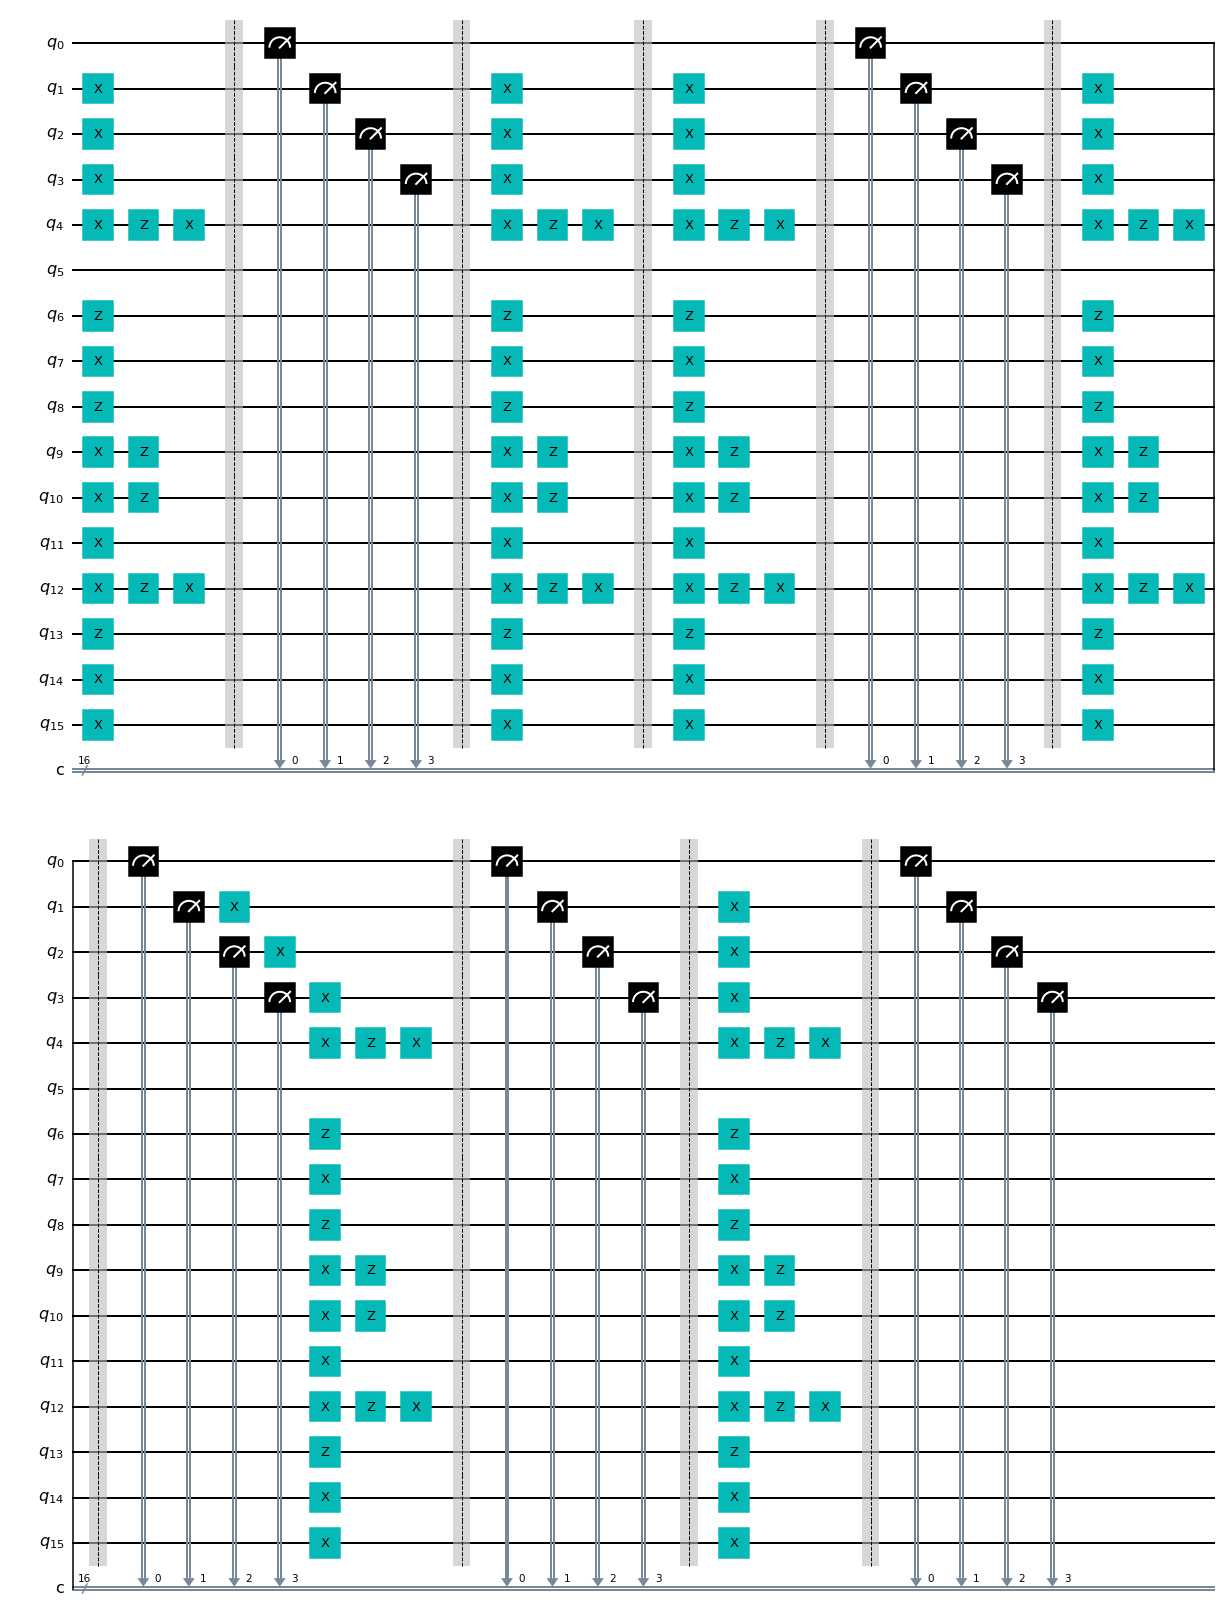

In [14]:
#Representing circuit diagram
encrypt.draw()